In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

def bootstrap_replicate_1d(data, func):
    bs_sample=np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


In [3]:
df=pd.read_csv('Michaelson_speed_of_light.csv')
print(df.head(5))

   Unnamed: 0  Expt  Run  Speed
0           1     1    1    850
1           2     1    2    740
2           3     1    3    900
3           4     1    4   1070
4           5     1    5    930


In [41]:
constant=351.77381511027687
data=df['Speed']*constant
michelson_speed_of_light_mean=np.mean(data)
print(michelson_speed_of_light_mean)

299852.0


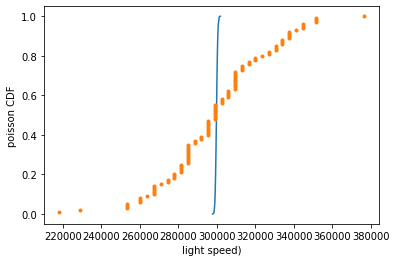

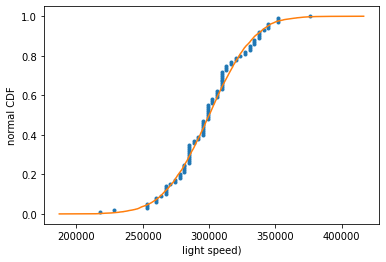

Michaelson light speed data is normal distributed


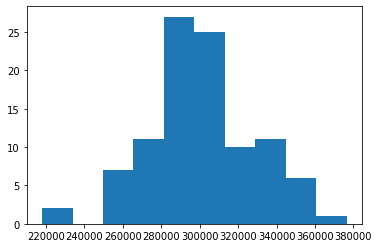

In [42]:
mean= np.mean(data)
std=np.std(data)
samples = np.random.poisson(mean, size=10000)
x,y=ecdf(data)
x_theor,y_theor = ecdf(samples)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('light speed)')
_ = plt.ylabel('poisson CDF')
plt.show()

#normal distribution
samples= np.random.normal(mean,std, size=10000)
x_norm,y_norm=ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_norm, y_norm)
_ = plt.xlabel('light speed)')
_ = plt.ylabel('normal CDF')
plt.show()

print("Michaelson light speed data is normal distributed")


_ = plt.hist(data, bins=10)
plt.show()

Comparing Michaelson speed of light with Newcombs speed of light
Michelson speed of light differs -8.0 meters
0     299015.742844
1     260320.623182
2     316604.433599
3     376405.982168
4     327157.648053
          ...      
95    330675.386204
96    334193.124355
97    281427.052088
98    284944.790239
99    306051.219146
Name: Speed, Length: 100, dtype: float64
small variations in values.  The darker dots are the variations.


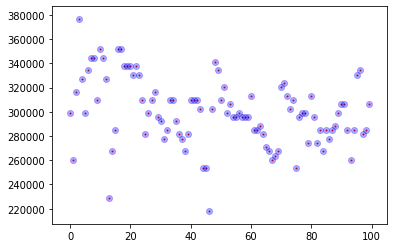

In [74]:
def diff_from_newcomb(data, newcomb_value=299860):
    return np.mean(data)-newcomb_value

print('Comparing Michaelson speed of light with Newcombs speed of light')

newcomb_speed_of_light_mean=299860 #km/s

diff_from_newcomb= diff_from_newcomb(michelson_speed_of_light_mean)

print("Michelson speed of light differs {0} meters".format(diff_from_newcomb))

michelson_shifted = data - diff_from_newcomb

print(michelson_shifted)

x=np.arange(0,len(michelson_shifted))

_=plt.scatter(x=x,y=data, c='red',s=1)
_=plt.scatter(x=x,y=michelson_shifted,c='blue',alpha=0.3)
plt.show

print('small variations in values.  The darker dots are the variations.')



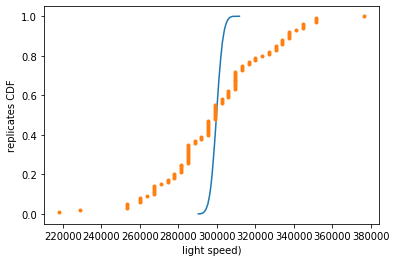

SEM 2765.452345998784
Standard Deviation of the replicates2767.087033879578


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


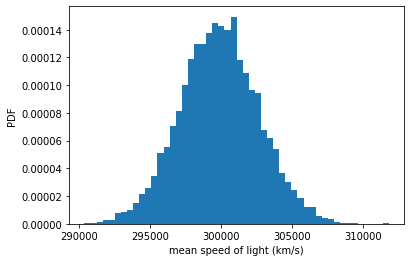

[296482.97137494 300915.32144533 298523.25950258 ... 302709.36790239
 301513.33693102 294301.97372126]
0.5021


In [75]:
bs_replicates = draw_bs_reps(michelson_shifted, np.mean,10000)

plt.clf()
x,y=ecdf(data)
x_replicate,y_replicate = ecdf(bs_replicates)
_ = plt.plot(x_replicate, y_replicate)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('light speed)')
_ = plt.ylabel('replicates CDF')
plt.show()

sem = np.std(data) / np.sqrt(len(data))
print("SEM {0}".format(sem))

bs_std = np.std(bs_replicates)
print("Standard Deviation of the replicates{0}".format(bs_std))

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

print(bs_replicates)

p_value= np.sum(bs_replicates<= newcomb_speed_of_light_mean)/10000

print(p_value)
